I will using spark MLlib to explore Movie Lense dataset from University of Minnessotta which I downloaded already 

In [1]:
import matplotlib
from matplotlib import pylab as plt
%matplotlib inline
import numpy as np

In [2]:
#Create a new RDD by reading data
user_data = sc.textFile("ml-100k/u.user")

In [3]:
#printing the first few records by using "take(n)" action on user_data RDD
#From below output we can see that the data has 5 cols id, age, sex, work profile and zip seperated by pipe (|)
user_data.take(5)

[u'1|24|M|technician|85711',
 u'2|53|F|other|94043',
 u'3|23|M|writer|32067',
 u'4|24|M|technician|43537',
 u'5|33|F|other|15213']

In [4]:
#Split each record and do some summary statistics

user_fields = user_data.map(lambda record : record.split("|")) #splitting each row by pipe
num_users = user_fields.map(lambda row:row[0]).count() #counting number of ids
num_genders = user_fields.map(lambda field:field[2]).distinct().count() #counting genders second value in each row
num_occupations = user_fields.map(lambda field:field[3]).distinct().count()
num_zipcodes = user_fields.map(lambda field: field[4]).distinct().count()

In [5]:
#Note the above code is lazy evaluated by acted upon an action making it executing instantaneously
#in the above example one of the example of actions is "count()"

print("Users: {} Genders: {} Occupations: {} Zipcodes:  {}".format(num_users, num_genders, num_occupations, num_zipcodes))

Users: 943 Genders: 2 Occupations: 21 Zipcodes:  795


In [6]:
ages = user_fields.map(lambda x: int(x[1])).collect()

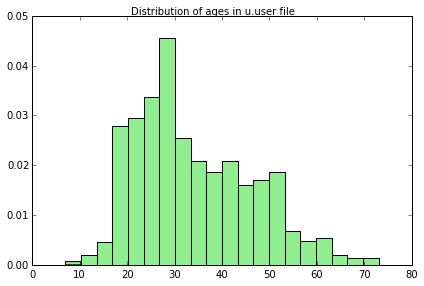

In [7]:
plt.hist(ages,bins = 20, color = "lightgreen",normed = True)
fig = matplotlib.pyplot.gcf()
fig.suptitle("Distribution of ages in u.user file")
fig.tight_layout()

From above fig we see that there are a few corrupted values coz some values is less than 10 years 

In [8]:
#outputing a tuple for each records in terms of key,value and summing up by keys and calling collect() action on it
#Key occuptaion name and value count of occupations
count_by_occupation = user_fields.map(lambda feilds : (feilds[3],1)).reduceByKey(lambda x,y: x+y).collect()

In [9]:
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([int(c[1]) for c in count_by_occupation])

In [10]:
#sorting the occupation counts by their counts
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

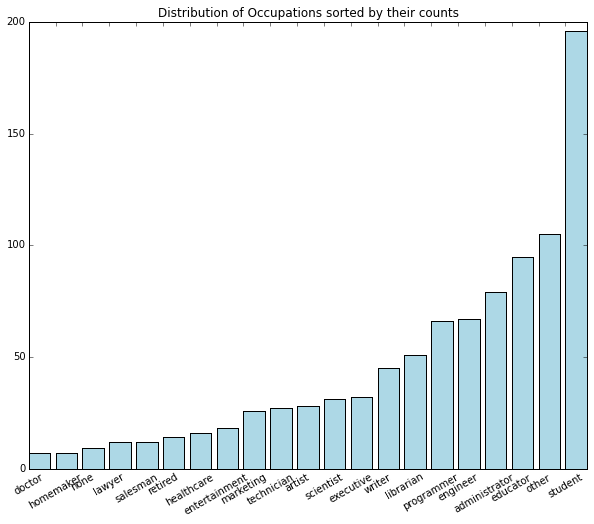

In [13]:
pos = np.arange(len(x_axis))
width = 1

ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, color = "lightblue")
plt.xticks(rotation = 30)
plt.title("Distribution of Occupations sorted by their counts")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 8)

In [14]:
#Spark has an API called count by values which does the same
count_zipcodes = user_fields.map(lambda feilds: feilds[4]).countByValue() #returns a python dict or map in scala and java

In [15]:
len(count_zipcodes) 
#there are in total 797 zip codes

795